# Single-cell RNAseq vs imaging

First we load the two avaialble eye-disc scRNAseq datasets


In [1]:
import chart_studio
import plotly.io as pio
import plotly.graph_objs as go

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy
import peakutils
from rnaseq import RNAseq
from rnaseq3 import RNAseq as RNAseq3

rnaseq = RNAseq3('/Users/rejsmont/Google Drive File Stream/My Drive/Projects/RDN-WDP/contrib/scRNAseq/EyeAntennal_Combined_DG2_v4.csv')
rnaseq3 = RNAseq3('/Users/rejsmont/Google Drive File Stream/My Drive/Projects/RDN-WDP/contrib/GSE115476_RAW/GSM3178869_DMS.expr.txt')
aerts = rnaseq.data
ariss = rnaseq3.data

Now, let's load the imaging data

In [2]:
from data import DiscData, OriginalData
from clustering import Clustering, ClusteredData

o_data = OriginalData('/Users/rejsmont/Google Drive File Stream/My Drive/Projects/RDN-WDP/processing/samples_complete.csv')
data = DiscData(o_data.cells)
clustering = Clustering('/Users/rejsmont/Google Drive File Stream/My Drive/Projects/RDN-WDP/processing/clustering/bigc100k6n20r1000_metadata.yml', disc_data=data)
clustered = ClusteredData(clustering)

Let's now look at the total number of cells and the number of Ato-positive cells

#### Aerts

In [3]:
ato = aerts[(aerts['ato'] > 0)]['ato'].agg(['mean', 'count'])
ato

mean       1.945946
count    333.000000
Name: ato, dtype: float64

In [4]:
total = aerts['ato'].agg(['mean', 'count'])
total

mean        0.27204
count    2382.00000
Name: ato, dtype: float64

In [5]:
ato.loc['count'] / total.loc['count']

0.1397984886649874

#### Ariss

In [6]:
ato = ariss[(ariss['ato'] > 0)]['ato'].agg(['mean', 'count'])
ato

mean       1.207547
count    265.000000
Name: ato, dtype: float64

In [7]:
total = ariss['ato'].agg(['mean', 'count'])
total

mean         0.013284
count    24089.000000
Name: ato, dtype: float64

In [8]:
ato.loc['count'] / total.loc['count']

0.011000871767196645

#### Image

In [9]:
cells = data.cells()
ato_cells = cells[cells['Gene'] == 'ato']
x = ato_cells['cy']
y = ato_cells['Venus']

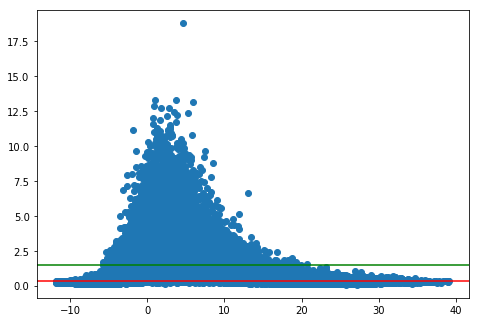

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axhline(0.35, c='red')
ax.axhline(1.5, c='green')
ax.scatter(x, y)

In [11]:
total = ato_cells.groupby(round(ato_cells['cy']))['Venus'].count()
ato = ato_cells[ato_cells['Venus'] > 1.5].groupby(round(ato_cells['cy']))['Venus'].count()
ato.sum() / total.sum()

0.21190078926154365

Let's look at the number of ato-positive cells within the MF.
According to [Ariss et al.](https://www.nature.com/articles/s41467-018-07540-z) MF cells can be identified
by the expression of `E(spl)m4-BFM` and `E(spl)mgamma-HLH`.

#### Aerts

In [12]:
mf = aerts[(aerts['E(spl)m4-BFM'] > 0)&(aerts['E(spl)mgamma-HLH'] > 0)]['ato'].count()
ato_mf = aerts[(aerts['E(spl)m4-BFM'] > 0)&(aerts['E(spl)mgamma-HLH'] > 0)&(aerts['ato'] > 0)]['ato'].count()
(mf, ato_mf, ato_mf / mf)

(526, 142, 0.26996197718631176)

#### Ariss

In [13]:
mf = ariss[(ariss['E(spl)m4-BFM'] > 0)&(ariss['E(spl)mgamma-HLH'] > 0)]['ato'].count()
ato_mf = ariss[(ariss['E(spl)m4-BFM'] > 0)&(ariss['E(spl)mgamma-HLH'] > 0)&(ariss['ato'] > 0)]['ato'].count()
(mf, ato_mf, ato_mf / mf)

(1551, 77, 0.04964539007092199)

Are there any non-MF ato-positive cells that express elav?

#### Aerts

In [14]:
ato = aerts[(aerts['E(spl)m4-BFM'] == 0)&(aerts['E(spl)mgamma-HLH'] == 0)&(aerts['ato'] > 0)]['ato'].count()
ato_elav = aerts[(aerts['E(spl)m4-BFM'] == 0)&(aerts['E(spl)mgamma-HLH'] == 0)&(aerts['ato'] > 0)&(aerts['elav'] > 0)]['ato'].count()
ato_sens = aerts[(aerts['ato'] > 0)&(aerts['sens'] > 0)]['ato'].count()
ato_elav_sens = aerts[(aerts['ato'] > 0)&(aerts['elav'] > 0)&(aerts['sens'] > 0)]['ato'].count()
(ato, ato_elav, ato_elav / ato, ato_sens, ato_elav_sens)

(128, 88, 0.6875, 71, 67)

#### Ariss

In [15]:
ato = ariss[(ariss['E(spl)m4-BFM'] == 0)&(ariss['E(spl)mgamma-HLH'] == 0)&(ariss['ato'] > 0)]['ato'].count()
ato_elav = ariss[(ariss['E(spl)m4-BFM'] == 0)&(ariss['E(spl)mgamma-HLH'] == 0)&(ariss['ato'] > 0)&(ariss['elav'] > 0)]['ato'].count()
ato_sens = ariss[(ariss['ato'] > 0)&(ariss['sens'] > 0)]['ato'].count()
ato_elav_sens = ariss[(ariss['ato'] > 0)&(ariss['sens'] > 0)&(ariss['elav'] > 0)]['ato'].count()
(ato, ato_elav, ato_elav / ato, ato_sens, ato_elav_sens)


(128, 24, 0.1875, 19, 12)